In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('car_prices.csv')

In [3]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [4]:
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()

In [5]:
df['make'].value_counts()

make
ford          93997
chevrolet     60587
nissan        54017
toyota        39966
dodge         30955
              ...  
dot               1
hyundai tk        1
mazda tk          1
dodge tk          1
lotus             1
Name: count, Length: 66, dtype: int64

In [6]:
df['model'].value_counts()

model
altima        19349
f-150         14479
fusion        12946
camry         12549
escape        11893
              ...  
mountnr           1
uplandr           1
ram van           1
400-class         1
458 italia        1
Name: count, Length: 851, dtype: int64

In [7]:
df['body'].value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [8]:
df['year'].value_counts()

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64

In [9]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [10]:
df['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [11]:
df['interior'].value_counts()

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [13]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [14]:
df['make'].isna().all()

False

In [15]:
df['make'].isna() == 'True'

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Name: make, Length: 558837, dtype: bool

In [16]:
na_rows = df['make'].dropna()

In [17]:
na_rows

0            kia
1            kia
2            bmw
3          volvo
4            bmw
           ...  
558832       kia
558833       ram
558834       bmw
558835    nissan
558836      ford
Name: make, Length: 548536, dtype: object

In [18]:
df = df.dropna(subset=['sellingprice'])
df = df.dropna(subset=['make'])
df = df.dropna(subset=['model'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548426 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548426 non-null  int64  
 1   make          548426 non-null  object 
 2   model         548426 non-null  object 
 3   trim          548076 non-null  object 
 4   body          545532 non-null  object 
 5   transmission  484842 non-null  object 
 6   vin           548422 non-null  object 
 7   state         548426 non-null  object 
 8   condition     536693 non-null  float64
 9   odometer      548336 non-null  float64
 10  color         547697 non-null  object 
 11  interior      547697 non-null  object 
 12  seller        548426 non-null  object 
 13  mmr           548400 non-null  float64
 14  sellingprice  548426 non-null  float64
 15  saledate      548426 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [20]:
unique_values_set = set(df['make'])
unique_model_set = set(df['model'])
unique_values_set

{'acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

In [21]:
make_mapping = {car: index + 1 for index, car in enumerate(unique_values_set)}   # create a numeric representation for each make

model_mapping = {car: index + 1 for index, car in enumerate(unique_model_set)}

make_mapping

{'smart': 1,
 'lamborghini': 2,
 'acura': 3,
 'chrysler': 4,
 'gmc': 5,
 'hyundai': 6,
 'mercedes-b': 7,
 'landrover': 8,
 'volvo': 9,
 'audi': 10,
 'mazda tk': 11,
 'suzuki': 12,
 'aston martin': 13,
 'kia': 14,
 'land rover': 15,
 'maserati': 16,
 'ford tk': 17,
 'infiniti': 18,
 'cadillac': 19,
 'toyota': 20,
 'saturn': 21,
 'vw': 22,
 'lotus': 23,
 'airstream': 24,
 'daewoo': 25,
 'bmw': 26,
 'mazda': 27,
 'oldsmobile': 28,
 'dot': 29,
 'fisker': 30,
 'mitsubishi': 31,
 'jaguar': 32,
 'saab': 33,
 'gmc truck': 34,
 'pontiac': 35,
 'honda': 36,
 'isuzu': 37,
 'lincoln': 38,
 'chev truck': 39,
 'ford': 40,
 'volkswagen': 41,
 'bentley': 42,
 'tesla': 43,
 'rolls-royce': 44,
 'mercedes-benz': 45,
 'ram': 46,
 'mercedes': 47,
 'hummer': 48,
 'geo': 49,
 'lexus': 50,
 'dodge': 51,
 'dodge tk': 52,
 'porsche': 53,
 'ferrari': 54,
 'mercury': 55,
 'plymouth': 56,
 'fiat': 57,
 'subaru': 58,
 'jeep': 59,
 'hyundai tk': 60,
 'chevrolet': 61,
 'scion': 62,
 'mini': 63,
 'buick': 64,
 'ford t

In [22]:
df['make'] = df['make'].replace(make_mapping)
df['model'] = df['model'].replace(model_mapping)
df['make']

0         14
1         14
2         26
3          9
4         26
          ..
558832    14
558833    46
558834    26
558835    66
558836    40
Name: make, Length: 548426, dtype: int64

In [23]:
df = df.drop(columns=['vin', 'condition'])

In [24]:
X = df[['make','model']]
y = df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict prices for the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", r2_score(y_test, y_pred))

Mean Squared Error: 93883231.11979708
Coefficients: [-17.83613136   1.24644763]
Intercept: 13890.071373017656
R^2: 0.0023435434191612092


InvalidIndexError: (slice(None, None, None), 0)

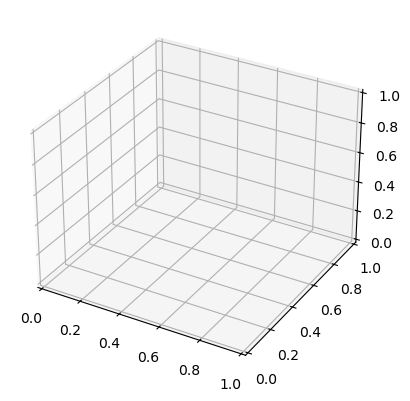

In [25]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted')

# Set labels
ax.set_xlabel('Make')
ax.set_ylabel('Model')
ax.set_zlabel('Price')

# Set title
ax.set_title('Actual vs. Predicted Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

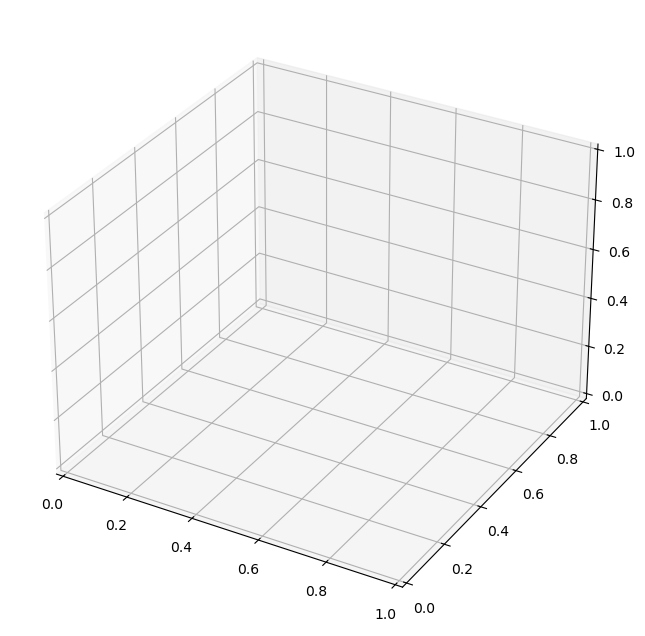

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
actual_scatter = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, alpha=0.6, c='blue', edgecolors='w', s=100, label='Actual')
predicted_scatter = ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, alpha=0.6, c='red', marker='^', edgecolors='w', s=100, label='Predicted')

# Set labels
ax.set_xlabel('Make')
ax.set_ylabel('Model')
ax.set_zlabel('Price')

# Set title
ax.set_title('Actual vs. Predicted Prices')

# Customize the z-axis
ax.zaxis.get_major_formatter().set_useOffset(False)
ax.zaxis.get_major_formatter().set_scientific(False)

# Legend
plt.legend(loc='upper left')

# Gridlines and background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [27]:
print(y_test)

269494    17000.0
443963    40800.0
148045    11300.0
361848    28500.0
354272     3300.0
           ...   
137355     1200.0
259139    12100.0
437788     8400.0
22421     10700.0
223792    22200.0
Name: sellingprice, Length: 109686, dtype: float64


In [28]:
make_model_df = df.iloc[:, 1:3]

print(make_model_df)

        make  model
0         14    327
1         14    327
2         26    220
3          9    435
4         26    693
...      ...    ...
558832    14    507
558833    46    376
558834    26    446
558835    66    210
558836    40    391

[548426 rows x 2 columns]


Put make and model in a csv file to see which ones numbers match. Then enter them into the app to see if you get a good value. Figure out how to input make and models to get a predicted price.

In [29]:


    feature_vector = np.array([[35, 403]])

    predicted_price = model.predict(feature_vector)

    print("Predicted Price:", predicted_price)

Predicted Price: [13768.12517064]


C:\Users\myahs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
def predict_price(inputted_make, inputted_model):
    
    lowercase_make = inputted_make.lower()
    lowercase_model = inputted_model.lower()
    
    for key, value in make_mapping.items():  # change inputted make to label encoded value
        
        if str(key) == lowercase_make:
            inputted_make = value
    
    for key, value in model_mapping.items():  # change inputted model to label encoded value
        
        if str(key) == lowercase_model:
            inputted_model = value
    

    feature_vector = np.array([[inputted_make, inputted_model]])

    predicted_price = model.predict(feature_vector)
    predicted_price = "{:.2f}".format(float(predicted_price))

    print("Predicted Price: $",predicted_price)

In [31]:
predict_price('kia', 'sorento')

Predicted Price: $ 14047.95


C:\Users\myahs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Sentiment Analysis Section

In [32]:
import numpy as np
import pandas as pd
#data=pd.read_csv('all_reviews.csv')
data = pd.read_csv('all_thirty_Reviews.csv')

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Vehicle  5576 non-null   object
 1   Reviews  5576 non-null   object
dtypes: object(2)
memory usage: 87.3+ KB


In [33]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myahs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import ast  # For safely evaluating strings containing Python literals

def extract_ratings_and_reviews(review_str):
    try:
        # Convert the string representation of the list of dictionaries into an actual list of dictionaries
        reviews = ast.literal_eval(review_str)

        # Extract 'Rating Count' and 'Review Body' from each dictionary
        rating_counts = [float(review.get('Rating Count')) for review in reviews]
        review_bodies = [review.get('Review Body') for review in reviews]

        return rating_counts, review_bodies
    except ValueError as e:
        # Return None or some default value if parsing fails
        print(f"Error parsing reviews: {e}")
        return None, None

# Apply the function to each row in your DataFrame and create new columns
data['Rating Counts'], data['Review Bodies'] = zip(*data['Reviews'].apply(lambda x: extract_ratings_and_reviews(x) if pd.notnull(x) else ([], [])))



In [39]:
from typing import List
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_review_text(text: str) -> str:
    # Remove punctuation, make lowercase, and tokenize
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if not word in stop_words]

    # Re-join tokens into a string
    cleaned_text = ' '.join(filtered_tokens)

    # Additional cleaning steps if necessary
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)  # Remove URLs
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # Remove extra whitespaces

    return cleaned_text

def clean_reviews(reviews: List[str]) -> List[str]:
    return [clean_review_text(review) for review in reviews]

# Assuming df is your DataFrame and it has a 'Review Bodies' column that needs to be cleaned
data['Cleaned Review Bodies'] = data['Review Bodies'].apply(clean_reviews)



In [40]:
from textblob import TextBlob

# Assume df is your DataFrame with 'Rating Counts' and 'Review Bodies'
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Calculate sentiment for each review in 'Review Bodies'
data['Sentiment Scores'] = data['Cleaned Review Bodies'].apply(lambda reviews: [calculate_sentiment(review) for review in reviews])

# Compare sentiment scores with 'Rating Counts' and categorize
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'




In [82]:
from textblob import TextBlob

# Assume 'data' is your DataFrame with a 'Cleaned Review Bodies' column that contains lists of reviews

# Function to calculate sentiment for a single review
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Function to apply sentiment calculation to each review within the lists in 'Cleaned Review Bodies'
def calculate_sentiments(reviews_list):
    return [calculate_sentiment(review) for review in reviews_list]

# Apply the function to each list of reviews in the DataFrame to get a list of sentiment scores
data['Sentiment Scores'] = data['Cleaned Review Bodies'].apply(calculate_sentiments)


In [41]:
def categorize_list_scores(scores):
    """Apply categorize_sentiment to each score in a list."""
    return [categorize_sentiment(score) for score in scores]

def categorize_list_ratings(ratings):
    """Apply categorize_rating to each rating in a list."""
    return [categorize_rating(rating) for rating in ratings]

# Apply the functions to each list in the DataFrame
data['Sentiment Categories'] = data['Sentiment Scores'].apply(categorize_list_scores)
data['Rating Categories'] = data['Rating Counts'].apply(categorize_list_ratings)

# Example of calculating match for the first list of scores and ratings
data['Match'] = data.apply(lambda x: [sc == rc for sc, rc in zip(x['Sentiment Categories'], x['Rating Categories'])], axis=1)
data['Accuracy'] = data['Match'].apply(lambda matches: sum(matches) / len(matches) if matches else None)

In [77]:
## import pandas as pd
from textblob import TextBlob

# Assuming data is your DataFrame


# Convert 'Review Bodies' column to strings
data['Review Bodies'] = data['Review Bodies'].astype(str)

# Define the calculate_sentiment function
def calculate_sentiment(review):
    return TextBlob(review).sentiment.polarity



# Calculate the average sentiment score for each vehicle
data['Average Sentiment Score'] = data.groupby('Vehicle')['Sentiment Scores'].transform('mean')

data.head()
# Example output
print(data[['Vehicle', 'Average Sentiment Score']])


                           Vehicle  Average Sentiment Score
0               Nissan-Altima-2015                 0.184232
1                      BMW-M5-2014                 0.250251
2                 Kia-Sorento-2015                 0.241601
3                   Volvo-S60-2015                 0.369007
4     BMW-6 Series Gran Coupe-2014                 0.000000
...                            ...                      ...
5571      Toyota-Land Cruiser-1998                 0.000000
5572                   BMW-M5-2009                 0.244773
5573            Subaru-Legacy-2015                 0.339475
5574                Volvo-S80-2015                 0.269262
5575                   BMW-M5-2001                 0.184045

[5576 rows x 2 columns]


In [44]:
def predict_base_price(inputted_make, inputted_model):
    lowercase_make = inputted_make.lower()
    lowercase_model = inputted_model.lower()
    
    for key, value in make_mapping.items():  # change inputted make to label encoded value
        if str(key) == lowercase_make:
            inputted_make = value
    
    for key, value in model_mapping.items():  # change inputted model to label encoded value
        if str(key) == lowercase_model:
            inputted_model = value
    
    feature_vector = np.array([[inputted_make, inputted_model]])

    predicted_price = model.predict(feature_vector)
    predicted_price = float(predicted_price)
    
    return predicted_price

In [191]:
def adjust_price_with_sentiment(inputted_make, inputted_model, inputted_year):
    base_price = predict_base_price(inputted_make, inputted_model)
    
    # Get the average sentiment score from the 'data' DataFrame
    average_sentiment_score = data.loc[(data['Vehicle'] == f"{inputted_make}-{inputted_model}-{inputted_year}"), 'Average Sentiment Score'].values[0]

    # Define the maximum percentage increase/decrease allowed
    max_percentage_change = 5  # 5% increase or decrease
    
    # Convert the sentiment score to a percentage change within the specified range
    if average_sentiment_score > 0:
        adjustment_factor = 1 + min(10*average_sentiment_score / 100, max_percentage_change / 100)
        # Increase price, capped at maximum percentage change
    elif average_sentiment_score < 0:
        adjustment_factor = 1 - min(abs(10*average_sentiment_score / 100), max_percentage_change / 100)
        # Decrease price, capped at maximum percentage change
    else:
        adjustment_factor = 1  # No adjustment if sentiment score is neutral

    adjusted_price = base_price * adjustment_factor
    
    print("Base Price:", base_price)
    print("Average Sentiment Score:", average_sentiment_score)
    print("Adjustment Factor:", adjustment_factor)
    print("Adjusted Price:", adjusted_price)





In [194]:
print("Positive Sentiment Score")
adjust_price_with_sentiment('Kia', 'Sorento', '2015')
print("\nPositive Sentiment Score Higher than the 5% Cap")
adjust_price_with_sentiment('Mitsubishi','Raider','2008')
print("\nNegative Sentiment Score")
adjust_price_with_sentiment('Hyundai','Sonata','1999')

Positive Sentiment Score
Base Price: 14047.953909322956
Average Sentiment Score: 0.2416013927150292
Adjustment Factor: 1.024160139271503
Adjusted Price: 14387.354432251854

Positive Sentiment Score Higher than the 5% Cap
Base Price: 14043.887107619203
Average Sentiment Score: 0.91
Adjustment Factor: 1.05
Adjusted Price: 14746.081463000164

Negative Sentiment Score
Base Price: 14479.818810680435
Average Sentiment Score: -0.017578124999999993
Adjustment Factor: 0.9982421875
Adjusted Price: 14454.366004177287


C:\Users\myahs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\myahs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\myahs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
min_avg_sentiment_score = data['Average Sentiment Score'].min()
max_avg_sentiment_score = data['Average Sentiment Score'].max()

print("Minimum Average Sentiment Score:", min_avg_sentiment_score)
print("Maximum Average Sentiment Score:", max_avg_sentiment_score)


Minimum Average Sentiment Score: -0.017578124999999993
Maximum Average Sentiment Score: 0.91


In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's assume 'data' is your original DataFrame with columns 'Vehicle', 'Rating Counts', 'Sentiment Scores', and 'Review Bodies'

# Expand the DataFrame to include review bodies
rows = []
for _, row in df_copy.iterrows():
    vehicle = row['Vehicle']
    rating_counts = row['Rating Counts']
    sentiment_scores = row['Sentiment Scores']
    review_bodies = row['Cleaned Review Bodies']
    for rating, sentiment, review_body in zip(rating_counts, sentiment_scores, review_bodies):
        rows.append({'Vehicle': vehicle, 'Rating Counts': rating, 'Sentiment Scores': sentiment, 'Cleaned Review Bodies': review_body})
expanded_df = pd.DataFrame(rows)

# Display the expanded DataFrame
print(expanded_df.head())





              Vehicle  Rating Counts  Sentiment Scores  \
0  Nissan-Altima-2015            5.0          0.171591   
1  Nissan-Altima-2015            1.0          0.000000   
2  Nissan-Altima-2015            5.0          0.725000   
3  Nissan-Altima-2015            2.0         -0.160000   
4  Nissan-Altima-2015            3.0          0.000000   

                               Cleaned Review Bodies  
0  bought model online auction car fantastic 190k...  
1  transmission nissan installed believe dealersh...  
2  altima fully sport pkg sunroof climate control...  
3  price high almost 16000 it500 dollors month ca...  
4  bought 25s altima 1 year ago transmission repl...  


In [146]:
# Count the number of reviews in each sentiment category
sentiment_counts = expanded_df['Sentiment Category'].value_counts()

# Determine the highest, lowest, and median sentiment scores
highest_score = expanded_df['Sentiment Scores'].max()
lowest_score = expanded_df['Sentiment Scores'].min()
median_score = expanded_df['Sentiment Scores'].median()

print("Sentiment Counts:")
print(sentiment_counts)
print("\nHighest Sentiment Score:", highest_score)
print("Lowest Sentiment Score:", lowest_score)
print("Median Sentiment Score:", median_score)


Sentiment Counts:
Sentiment Category
Positive    79063
Negative     6616
Neutral      3244
Name: count, dtype: int64

Highest Sentiment Score: 1.0
Lowest Sentiment Score: -1.0
Median Sentiment Score: 0.2875


In [160]:
# Define function to map sentiment scores to sentiment categories
def map_to_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Map sentiment scores to sentiment categories
expanded_df['Sentiment Category'] = expanded_df['Sentiment Scores'].apply(map_to_sentiment_category)

# Define function to map ratings to sentiment categories
def map_rating_to_sentiment_category(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Map ratings to sentiment categories
expanded_df['Actual Sentiment Category'] = expanded_df['Rating Counts'].apply(map_rating_to_sentiment_category)

# Calculate confusion matrix
confusion_matrix = pd.crosstab(expanded_df['Actual Sentiment Category'], expanded_df['Sentiment Category'])

# Calculate accuracy
accuracy = (confusion_matrix['Positive']['Positive'] + confusion_matrix['Neutral']['Neutral'] + confusion_matrix['Negative']['Negative']) / len(expanded_df)

print("Confusion Matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
Sentiment Category         Negative  Neutral  Positive
Actual Sentiment Category                             
Negative                       2445      418      3194
Neutral                        1007      212      3748
Positive                       3524     1764     72611
Accuracy: 0.8464401785814694


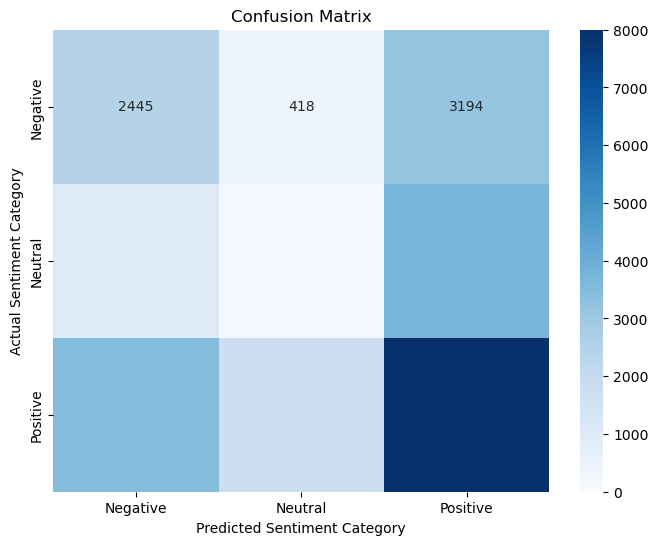

In [161]:
import seaborn as sns

# Plot the confusion matrix as a heatmap with adjusted scale
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', vmin=0, vmax=8000)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment Category')
plt.ylabel('Actual Sentiment Category')
plt.show()


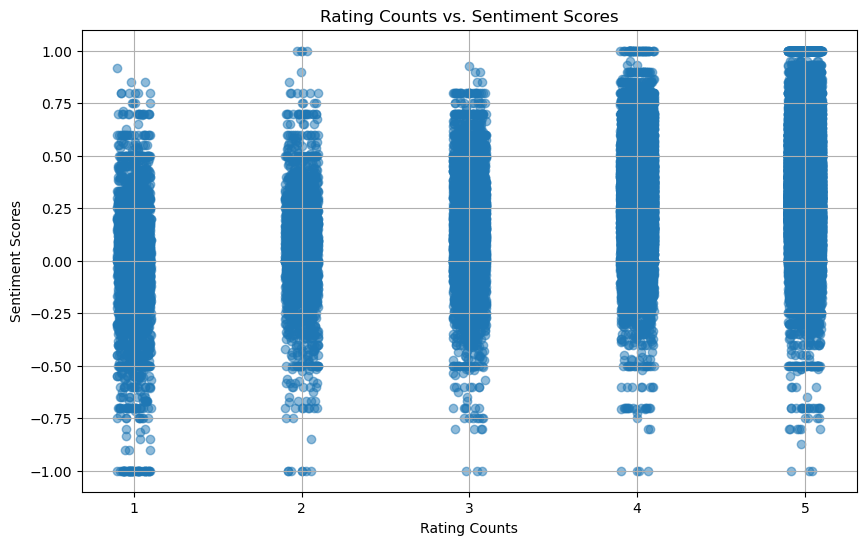

In [148]:
ratings = expanded_df['Rating Counts'].values
# Extract the 'Sentiment Scores' as an array-like object
sentiment_scores = expanded_df['Sentiment Scores'].values

# Add jitter to the ratings for plotting
ratings_jittered = ratings + np.random.uniform(-0.1, 0.1, size=len(ratings))

# Plot with jitter and alpha for transparency
plt.figure(figsize=(10, 6))
plt.scatter(ratings_jittered, sentiment_scores, alpha=0.5)
plt.xlabel('Rating Counts')
plt.ylabel('Sentiment Scores')
plt.title('Rating Counts vs. Sentiment Scores')
plt.grid(True)
plt.show()

# Scatter PLot Analysis
The scatter plot shows sentiment scores for reviews across a 1-to-5 rating system. Notably, while lower ratings (1's and 2's) predominantly have negative sentiment scores, as one would expect, there are still a considerable number of reviews at these rating levels with positive sentiment scores.

This could occur for several reasons:

Mixed Feedback: A review could contain both negative and positive comments, such as praising certain features while criticizing others. Sentiment analysis might pick up on the positive aspects, resulting in a higher sentiment score.

Reviewer Tendencies: Some users may use a harsh rating scale but still use positive language, or they might add a positive note to a generally negative review, such as acknowledging a single good feature in an otherwise disappointing product.

Sentiment Analysis Nuances: Sentiment analysis tools, like TextBlob used here, might interpret certain phrases or words as positive even within a largely critical context, leading to higher sentiment scores for low ratings.

Data Entry Errors: There could be inconsistencies where reviewers mistakenly select the wrong rating or provide a review that doesn't align with the rati given.

.

NMF Topics:
Topic 0:
car recommend looking buy amazing time want fast perfect price
Topic 1:
mile year bought problem new oil engine issue transmission used
Topic 2:
vehicle family recommend suv purchased looking purchase excellent highly dependable
Topic 3:
great run look value snow handle price performance condition money
Topic 4:
good really price nice value look condition pretty looking run
Topic 5:
need met meet family work expectation space fit perfect legroom
Topic 6:
room plenty leg lot family space trunk seat kid cargo
Topic 7:
truck cab bed looking work ranger ford tow towing trailer
Topic 8:
love absolutely kid way style color im look bought jeep
Topic 9:
owned ive best year far driven performance bmw value money
Topic 10:
drive fun easy wheel lot fast snow super convertible handle
Topic 11:
seat ride comfortable nice smooth interior power feature heated leather
Topic 12:
gas mileage better low highway excellent decent mpg tank city
Topic 13:
like new look feel really handle

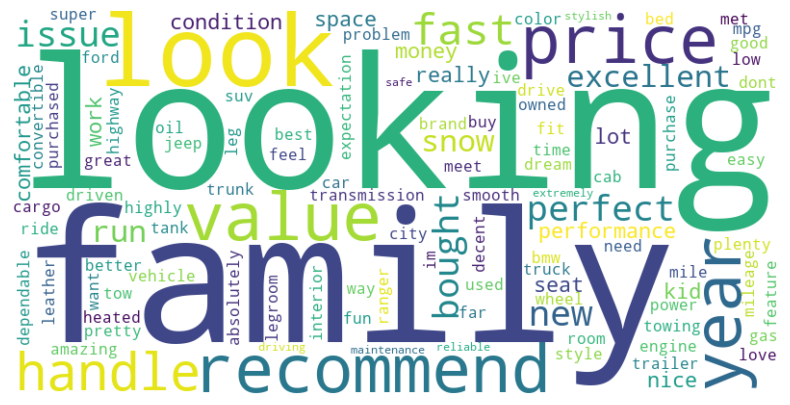

In [96]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display NMF topics
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_topics(model, feature_names, no_top_words):
    all_words = []
    for topic_idx, topic in enumerate(model.components_):
        all_topic_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(f"Topic {topic_idx}:")
        print(all_topic_words)
        all_words.append(all_topic_words)
    all_words_str = " ".join(all_words)
    generate_wordcloud(all_words_str, "")

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Join tokens into a single string

# Preprocess review bodies
expanded_df['Cleaned Text'] = expanded_df['Cleaned Review Bodies'].apply(preprocess_text)

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(expanded_df['Cleaned Text'])

# Define number of topics and components
no_topics = 15
no_top_words = 10

# Fit NMF model
nmf_model = NMF(n_components=no_topics, random_state=1, init='nndsvd')
nmf_W = nmf_model.fit_transform(tfidf)
nmf_H = nmf_model.components_

# Display topics
print("NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


# Analysis
The word cloud vividly encapsulates the prevalent sentiments within car reviews, showcasing the terms most frequently mentioned by consumers. Dominant in the visualization are words like "family," "recommend," and "comfortable," which point to a strong appreciation for vehicles that cater to family needs and comfort. Terms such as "value," "performance," and "reliable" are also prominently featured, indicating that practical performance metrics are central to customer satisfaction. The presence of emotive words like "love," "perfect," and "fun" alongside practical descriptors like "gas," "mileage," and "maintenance" reveals a balanced sentiment where emotional satisfaction intersects with functional appraisal. The large, central placement of "recommend" suggests a willingness among satisfied customers to endorse their vehicles to others. This word cloud, in summary, portrays a positive consumer landscape where the quality, utility, and emotional fulfillment derived from these vehicles are openly celebrated and are likely influential in guiding prospective buyers.s.

LDA Topics 

Topic 0:
manual second trouble traded mazda offer college model transmission business
Topic 1:
cylinder haul spot liter bed difficult boat blind engine cyl
Topic 2:
seat control heated leather radio window rear steering door roof
Topic 3:
mitsubishi ranger eclipse vette blazer hauled galant titan tuned sequoia
Topic 4:
car great gas good mileage reliable comfortable vehicle mpg need
Topic 5:
seat car room great lot comfortable love plenty space good
Topic 6:
truck vehicle suv van winter road snow test drive weather
Topic 7:
driven expensive cheap tire gone mph dodge coolant failure speed
Topic 8:
car drive like great fun handle love interior look feel
Topic 9:
jeep wear tear mi research cherokee lucky wrangler la changer
Topic 10:
volvo wish loaded fully load mustang provides compare chevrolet volvos
Topic 11:
car year mile bought ive new owned like vehicle used
Topic 12:
mile problem engine oil car transmission replaced issue time year
Topic 13:
let paint longer gm ford c

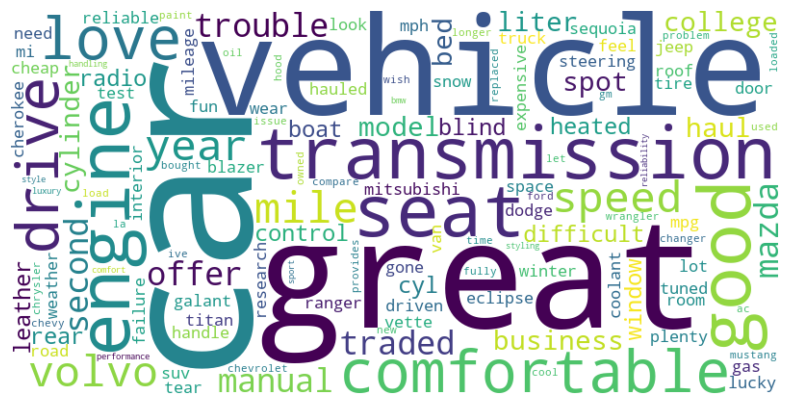

In [101]:
# LDA
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(expanded_df['Cleaned Text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_
no_top_words = 10
no_top_documents = 4
print("LDA Topics \n")
display_topics(lda_model, tf_feature_names, no_top_words)


In [193]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88923 entries, 0 to 88922
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vehicle                    88923 non-null  object 
 1   Rating Counts              88923 non-null  float64
 2   Sentiment Scores           88923 non-null  float64
 3   Cleaned Review Bodies      88923 non-null  object 
 4   Sentiment Category         88923 non-null  object 
 5   Actual Sentiment Category  88923 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB
